## Payments

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
payments = pd.read_csv('../datasets/payments.csv')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


- **"payment_sequential"** -> Indicates the number of payment of total installments
- **"payment_type"** -> Indicates the payment type it can be ['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined']
- **"payment_installments"** -> Indicates the number of installments payed in the period
- **"payment_value"** -> Indicates the period payment value 

Using Descriptive Statistics look the properties at this variable:

            Payment mean: 154.10038041699553
            Payment median: 100.0
            Payment std: 217.49301707022238
 


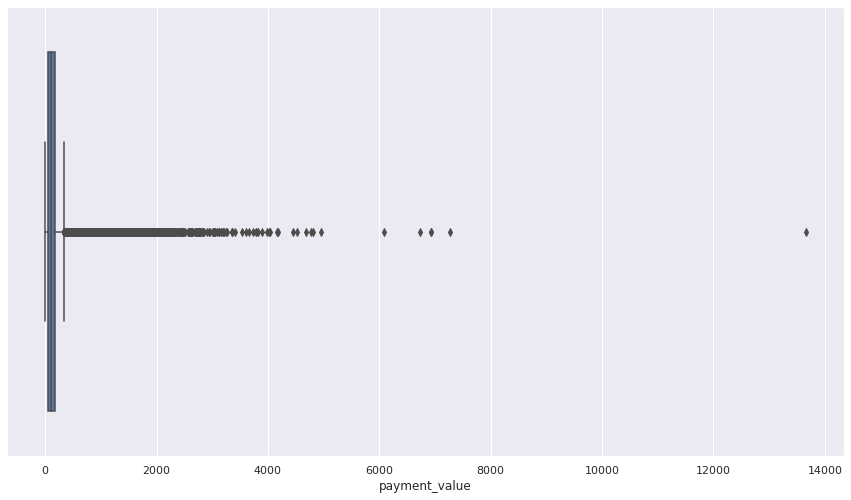

In [5]:
# First look at distribution of payments

sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(payments['payment_value'])

print(f'''Using Descriptive Statistics look for the variable properties:

            Payment mean: {np.mean(payments['payment_value'])}
            Payment median: {np.median(payments['payment_value'])}
            Payment std: {np.std(payments['payment_value'])}
 ''')

Ok, there is many outliers, but is normal if the total payment is made in 1 installment

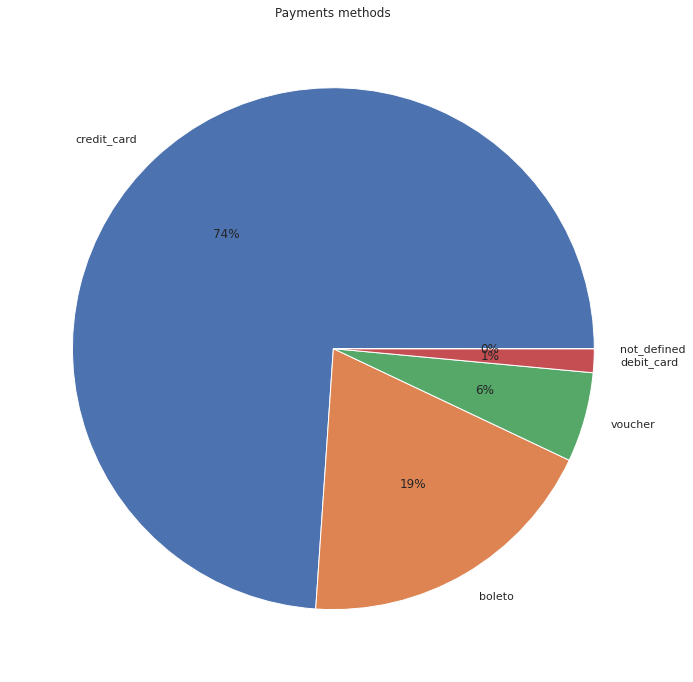

In [6]:
# Inspect the payment type

data = payments['payment_type'].value_counts()
labels = payments['payment_type'].unique()

plt.figure(figsize=(12,12))
plt.pie(data, labels=labels, autopct='%0.f%%')
plt.title("Payments methods")
plt.show()

Now look the relation between value payment and installments, my hypothesis is greater payment value is as greater installments number.

In [9]:
# I'll use the processed data of payments

new_payments = pd.read_csv('../datasets/processed/payments.csv')
new_payments.head()

,order_id,boleto,credit_card,debit_card,not_defined,voucher,payment_sequential,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,0.0,72.19,0.0,0.0,0.0,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,0.0,259.83,0.0,0.0,0.0,1,259.83
2,000229ec398224ef6ca0657da4fc703e,0.0,216.87,0.0,0.0,0.0,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,0.0,25.78,0.0,0.0,0.0,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,0.0,218.04,0.0,0.0,0.0,1,218.04


In [16]:
mean_installments = new_payments['payment_sequential'].mean()
mean_payment = new_payments['payment_value'].mean()

1.0455148833467418 160.9902666934835


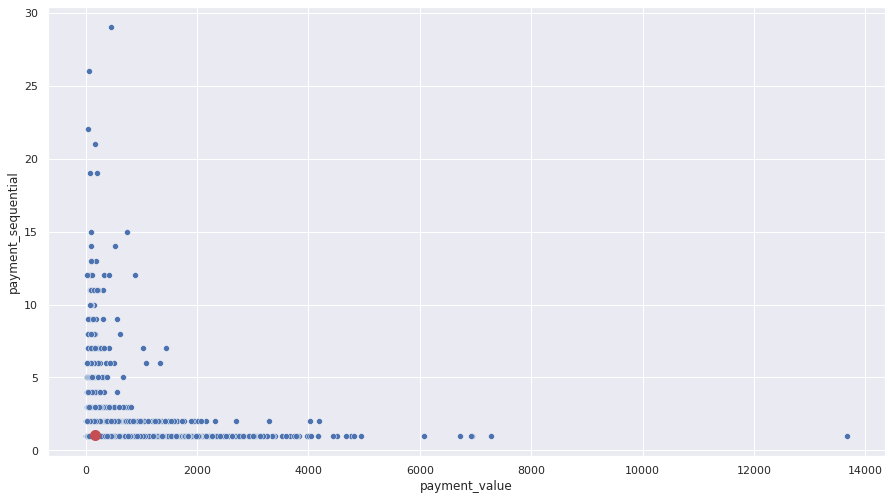

In [28]:
sns.scatterplot(x=new_payments['payment_value'], y=new_payments['payment_sequential'])
plt.scatter(mean_payment, mean_installments, s=100, color='r')
plt.show()

Wow! it's not as i thinked, as greater payment value, the installmet tend to be one.

Of course... 
The mean values for payments and installments are lower, these is:

- *mean payment values: 160.9902666934835*
  
and

- *mean installments : 1.0455148833467418*

In [30]:
# Inspect the cases when installments > 1

credits = new_payments[new_payments['payment_sequential'] > 1]

In [53]:
credits_id = pd.DataFrame(credits['order_id'])

In [37]:
credits_table = credits_id.merge(payments, how='left', on='order_id')
credits_table.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
1,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
2,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
3,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
4,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00


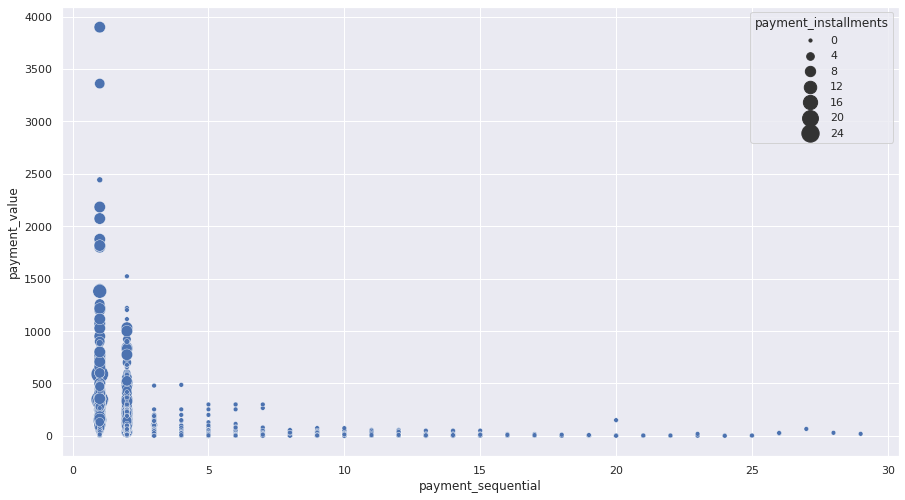

In [52]:
sns.scatterplot(x=credits_table['payment_sequential'], y=credits_table['payment_value'], 
                size=credits_table['payment_installments'], sizes=(10,300))
plt.show()

Here we can see customers prefer pay greater number of installments in few time, and some that pay the minimum installment and extend the pay time inclusive some periods don't make the payment.

If the dataset had date of payment, we can search for relation between payments and date.